[
    {
        "id": "1456233395931910151",
        "language": "en",
        "text": "@CoinDCX @mihirjajal20 @ronak090 My favourite coin is etheruem..Going big in the future\ud83d\ude80\ud83d\udcc9\n#TryCrypto #CoinDCXDiwaliTreat"
    },
    {
        "id": "1456232905395429385",
        "language": "en",
        "text": "RT @CoinDCX: #ContestAlert\n\nOur Diwali gift to you \ud83c\udf81\nFor this auspicious weekend of #Diwali, we are giving away #Cardano worth 100 INR to 1\u2026"
    },
    {
        "id": "504289837629726720",
        "language": "en",
        "text": "My First Tweet! #FirstTweet"
    }
]
<class 'str'>
[{'id': '1456233395931910151', 'extraversion': 0.2909476547820774, 'active': 0.798653617825731, 'assertive': 1, 'cheerful': 0.7509884612281126, 'openness': 0.6371453931366785, 'adventurous': 0.7162568731196182, 'artistic': 0.7607405101958479, 'emotionally_aware': 0.2688499268019965, 'imaginative': 0.9847379280930478, 'intellectual': 0.7914606171686781, 'conscientiousn

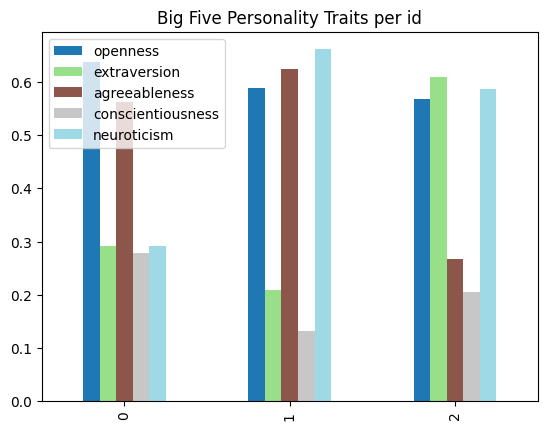

In [2]:

import pandas as pd
import tweepy
from tweepy import OAuthHandler

consumer_key = "uJUfRK2GdxfdqOyo43RWmkCbd"
consumer_secret = "sK6WNrfYZKBhFKXyneWv6URESMwq7GwcLbKQER1D7B50WSkwdj"
access_key = "2551921020-ZkWwPqeqRgtJtESKnd5nnAWbVa12oK56WT1zBEB"
access_secret = "PIKiOs0eewDKqsaKiPqQ99L7lrYCqa9clrqm5QMrqrX0m"

# consumer_key = "McwBKhuvhwr23a31vl1Dm1wKE"
# consumer_secret = "BL2lQ3F0Qgf8Fhg9jzSt0xf580Xvezyn5k4UGwIohDaRicb6uc"
# access_key = "1644950797464240129-CUUoK8X2NrGDNAlQlgCJ19y0TkLw04"
# access_secret = "15QGJ2nnAUmUL1j2d5HzOee0Cor6va5jmmMYo78mmhZ61"

#Pass in our twitter API authentication key
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)
#Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

#username=input("Enter the Username :")
# username= "imVkohli"
no_of_tweets =5



try:
    #The number of tweets we want to retrieved from the user
    tweets = api.user_timeline(count=no_of_tweets)
    
    #Pulling Some attributes from the tweet
    attributes_container = [[tweet.id,tweet.lang,tweet.text] for tweet in tweets]

    #Creation of column list to rename the columns in the dataframe
    columns = ["id","language","text"]
    
    #Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,',str(e))
    time.sleep(5)


tweets_df.head(5)

import json

data = []
for i in range(len(tweets_df)):
    row = {
        "id": str(tweets_df.iloc[i]['id']),
        "language": tweets_df.iloc[i]['language'],
        "text": tweets_df.iloc[i]['text']
    }
    data.append(row)

payload = json.dumps(data, indent=4)

print(payload)


import pandas as pd

import http.client


conn = http.client.HTTPSConnection("big-five-personality-insights.p.rapidapi.com")

#payload = "[\r\n    {\r\n        \"id\": \"1\",\r\n        \"language\": \"en\",\r\n        \"text\": \"france is bad\"\r\n    }\r\n]"

headers = {
    'content-type': "application/json",
    'X-RapidAPI-Key': "508b44e43cmsh2a9857a1eda89d1p162d52jsn96a281211048",
    'X-RapidAPI-Host': "big-five-personality-insights.p.rapidapi.com"
    }

conn.request("POST", "/api/big5", payload, headers)

res = conn.getresponse()
data = res.read()
#here datatype of data taken as bytes 
#hence first it is converted to string
data=data.decode("utf-8")
print(type(data))
#then to dictionary
dict=json.loads(data)
print(dict)
#finally into df
df=pd.DataFrame(dict)

#taken specific columns
col=["id","openness","extraversion","agreeableness","conscientiousness","neuroticism"]
df=df[col]

import matplotlib.pyplot as plt
# colormap is used to represent bars in predefined color set like autumm,cool,rainbow
ax=df.plot(kind='bar', colormap='tab20')
#ax.legend(loc='upper right')
plt.title('Big Five Personality Traits per id')
plt.show()

In [11]:
import http.client

conn = http.client.HTTPSConnection("ekman-emotion-analysis.p.rapidapi.com")

# payload = "[\r\n    {\r\n        \"id\": \"1\",\r\n        \"language\": \"en\",\r\n        \"text\": \"I love the service\"\r\n    }\r\n]"

headers = {
    'content-type': "application/json",
    'Accept': "application/json",
    "X-RapidAPI-Key": "b168acac81msh4f4b114d33e4739p13a998jsna866711927f2",
    "X-RapidAPI-Host": "ekman-emotion-analysis.p.rapidapi.com"
    }

conn.request("POST", "/ekman-emotion", payload, headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))
data=data.decode("utf-8")
print(type(data))
# #then to dictionary
dict=json.loads(data)
print(dict)



df = pd.DataFrame(columns=['id', 'prediction', 'probability'])

# Loop through each dictionary in the list
for d in dict:
    # Get the id value from the dictionary
    id_val = d['id']
    
    # Loop through each prediction dictionary in the predictions list
    for p in d['predictions']:
        # Get the prediction and probability values from the prediction dictionary
        prediction_val = p['prediction']
        probability_val = p['probability']
        
        # Append a new row to the DataFrame with the id, prediction, and probability values
        df = df.append({'id': id_val, 'prediction': prediction_val, 'probability': probability_val}, ignore_index=True)


print(df)

# export DataFrame to CSV file
#df.to_csv('predictions.csv', index=False)

[{"id":"1456233395931910151","predictions":[{"prediction":"joy","probability":0.53428}]},{"id":"1456232905395429385","predictions":[{"prediction":"surprise","probability":0.97044}]},{"id":"504289837629726720","predictions":[{"prediction":"joy","probability":0.90359}]}]
<class 'str'>
[{'id': '1456233395931910151', 'predictions': [{'prediction': 'joy', 'probability': 0.53428}]}, {'id': '1456232905395429385', 'predictions': [{'prediction': 'surprise', 'probability': 0.97044}]}, {'id': '504289837629726720', 'predictions': [{'prediction': 'joy', 'probability': 0.90359}]}]
                    id prediction  probability
0  1456233395931910151        joy      0.53428
1  1456232905395429385   surprise      0.97044
2   504289837629726720        joy      0.90359


<ipython-input-11-1c90d5567dcb>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id_val, 'prediction': prediction_val, 'probability': probability_val}, ignore_index=True)
<ipython-input-11-1c90d5567dcb>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id_val, 'prediction': prediction_val, 'probability': probability_val}, ignore_index=True)
<ipython-input-11-1c90d5567dcb>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'id': id_val, 'prediction': prediction_val, 'probability': probability_val}, ignore_index=True)


In [ ]:



acces token


token secreatr





consumer_key = "HimanshuF110164495534356548812"
consumer_secret = "AAAAAAAAAAAAAAAAAAAAAEZnmgEAAAAAHbsdx1JF7EfUa2aXmHs1ViEIHnk%3DigQn4iYayUgxb1vcAZzeqJTjFEUi0g9kkEnVrLFRHP5FZ6htMB"
access_key = "1644950797464240129-m5PaFk7c7iiXe5JBIxtkdJPW01Vs29"
access_secret = "2icjQnsgMMEiILMLauFq2cnQlFWMmhLrXJHkbpFawupVb"